# 기본 설정

In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# 데이터 불러오기
data = pd.read_csv('C:/Users/USER/BITAmin/data/insurance.csv')

# features & label 분리
X = data.drop(['Response'], axis = 1 , inplace = False)
y = data['Response']

# 데이터셋 설명

한 건강보험회사 고객의 데이터를 이용해 기존 고객이 해당 회사에서 앞으로 제공할 자동차보험에 가입할지에 대한 예측 모형 실습

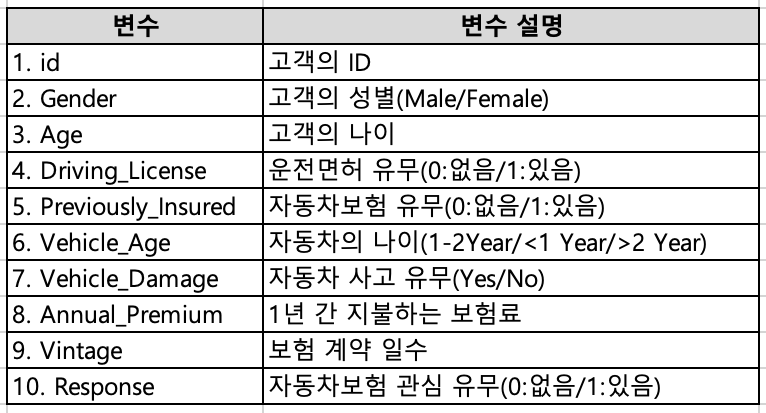

# Q1-1

개인의 고유식별번호를 나타내는 'id'는 설명력이 없는 변수이므로 제거하고, 설명력이 없는 이유를 설명하시오.

In [2]:
# 'id' 살펴보기
X.id.head()

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64

In [3]:
# 설명력이 없는 이유
# 'id'는 말 그대로 개인의 고유식별번호이므로 종속변수인 자동차보험 관심 유무를 설명에는 필요없는 변수이다.
#  오히려 수치의 크고 작은 특성이 반영되어 예측 성능을 저하시킬 수도 있다.
# 특히 id를 몇 개 살펴본 결과, 단순히 인덱스 역할을 하는 변수이므로 지워줘야 한다.

In [4]:
# 따라서 'id' 제거
X.drop(['id'], axis=1, inplace=True)

# Q1-2

범주형 변수와 수치형 변수를 분리해서 각각 X_c, X_n에 저장하시오.

In [5]:
# 데이터타입 확인
X.dtypes

# or
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 8 columns):
Gender                381109 non-null object
Age                   381109 non-null int64
Driving_License       381109 non-null int64
Previously_Insured    381109 non-null int64
Vehicle_Age           381109 non-null object
Vehicle_Damage        381109 non-null object
Annual_Premium        381109 non-null int64
Vintage               381109 non-null int64
dtypes: int64(5), object(3)
memory usage: 23.3+ MB


In [6]:
# 범주형 변수 분리
X_c = X[['Gender', 'Vehicle_Age', 'Vehicle_Damage']]
X_c.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [7]:
# 수치형 변수 분리
X_n = X.drop(X_c, axis=1 , inplace=False) 
X_n.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage
0,44,1,0,40454,217
1,76,1,0,33536,183
2,47,1,0,38294,27
3,21,1,1,28619,203
4,29,1,1,27496,39


# Q1-3

범주형 변수를 레이블 인코딩하시오.

Hint: for문과 LabelEncoder()을 이용하세요.

참고: 'Driving_License'와 'Previously_Insured'는 이미 0, 1로 인코딩 되어있기 때문에 따로 인코딩해주지 않아도 OK

In [8]:
features = X_c.columns

for feature in features:
        le = LabelEncoder()
        le = le.fit(X_c[feature])
        X_c[feature] = le.transform(X_c[feature])
        
X_c.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,1,2,1
1,1,0,0
2,1,2,1
3,1,1,0
4,0,1,0


# Q1-4

수치형 변수에 대해 피처 스케일링(표준화)을 진행하세요.

Hint: StandardScaler를 이용하세요.

In [9]:
sc = StandardScaler()
X_n = pd.DataFrame(sc.fit_transform(X_n), columns=X_n.columns)

X_n.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage
0,0.333777,0.046208,-0.919638,0.574539,0.748795
1,2.396751,0.046208,-0.919638,0.172636,0.342443
2,0.527181,0.046208,-0.919638,0.449053,-1.521998
3,-1.148985,0.046208,1.087384,-0.113018,0.581474
4,-0.633242,0.046208,1.087384,-0.178259,-1.378580


In [10]:
# 참고!
# 사실 여기서, 데이터를 살펴보시면 아시겠지만 'Driving_License'와 'Previously_Insured'는 이미 입력값 자체가
# 0과 1로 레이블 인코딩된 채로 들어왔기 때문에 수치형 변수로 보고 스케일링을 진행할 필요는 없습니다.
# 보통 레이블인코딩 된 변수의 표준화는 모델 학습에 큰 영향은 미치지 않지만 추천하지 않습니다.
# 일반적으로 범주형 변수에는 표준화를 진행하지 않는다고 생각하시는게 편하실 것 같아요!
# 그래서 범주형 변수와 수치형 변수를 분리한 후, 각각 인코딩과 스케일링을 진행한 것입니다 ;)

# Q1-5

Q1-3과 Q1-4에서 인코딩과 스케일링을 진행한 features를 다시 X로 합쳐주세요.

In [11]:
X = pd.concat([X_c, X_n], axis=1)

X.head()

,Gender,Vehicle_Age,Vehicle_Damage,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage
0,1,2,1,0.333777,0.046208,-0.919638,0.574539,0.748795
1,1,0,0,2.396751,0.046208,-0.919638,0.172636,0.342443
2,1,2,1,0.527181,0.046208,-0.919638,0.449053,-1.521998
3,1,1,0,-1.148985,0.046208,1.087384,-0.113018,0.581474
4,0,1,0,-0.633242,0.046208,1.087384,-0.178259,-1.378580


# Q2-1

데이터를 train set과 test set으로 구분하시오.

단, test_size는 0.3, random_state는 2로 지정하세요.

In [12]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=.3, random_state=2)

# Q2-2

의사 결정 트리를 이용하여 모델을 학습 및 예측을 수행하고 accuracy를 확인해주세요.

단, 정확도는 소수점 4자리까지 출력해주세요.

In [31]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(Xtrain, ytrain)
dt_pred = dt_clf.predict(Xtest)
print('DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy_score(ytest, dt_pred)))

DecisionTreeClassifier 정확도 :0.8223


# Q3-1

cross_val_score를 이용하여 모델을 학습 및 예측을 수행하고 accuracy를 확인해주세요.

단, 정확도는 소수점 4자리까지 출력해주세요.

In [32]:
scores = cross_val_score(dt_clf, X, y, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8219
교차 검증 1 정확도: 0.8234
교차 검증 2 정확도: 0.8247
교차 검증 3 정확도: 0.8212
교차 검증 4 정확도: 0.8244
평균 정확도: 0.8231


# Q3-2

RandomSearchCV를 이용하여 모델을 학습 및 예측을 수행하고 accuracy를 확인해주세요.

단, 의사결정트리 모델을 이용하고 random_state는 2로 지정해주세요.

가능하다면 성능을 최대한 높여주세요! 

(파이팅!) 

In [33]:
dtc = DecisionTreeClassifier(random_state=2)

param_grid={'criterion' :['gini','entropy'], 'max_depth':[3,4,5,6,7,8],'min_samples_leaf':[1,5,10,30,50]}

rcv = RandomizedSearchCV(dtc, param_distributions=param_grid,scoring='accuracy', n_iter=8)
rcv.fit(Xtrain,ytrain)

print('final params', rcv.best_params_)   
print('best score', rcv.best_score_)     
print(rcv.score(Xtest,ytest))

final params {'min_samples_leaf': 30, 'max_depth': 4, 'criterion': 'entropy'}
best score 0.8766755630122309
0.879212475838122
